## Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('new_churn_data.csv')

In [3]:
## Data Preparation
user_identifier = dataset['user']
dataset = dataset.drop(columns = ['user'])

## One-Hot Encoding

In [4]:
dataset.housing.value_counts()

na    13856
R     10969
O      2171
Name: housing, dtype: int64

In [5]:
dataset.groupby('housing')['churn'].nunique().reset_index()

,housing,churn
0,O,2
1,R,2
2,na,2


In [6]:
dataset = pd.get_dummies(dataset)
dataset.columns

Index(['churn', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'ios_user',
       'android_user', 'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred', 'housing_O',
       'housing_R', 'housing_na', 'payment_type_Bi-Weekly',
       'payment_type_Monthly', 'payment_type_Semi-Monthly',
       'payment_type_Weekly', 'payment_type_na', 'zodiac_sign_Aquarius',
       'zodiac_sign_Aries', 'zodiac_sign_Cancer', 'zodiac_sign_Capricorn',
       'zodiac_sign_Gemini', 'zodiac_sign_Leo', 'zodiac_sign_Libra',
       'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius', 'zodiac_sign_Scorpio',
       'zodiac_sign_Taurus', 'zodiac_sign_Virgo', 'zodiac_sign_na'],
      dtype='object')

## Drop correlated columns

In [7]:
dataset = dataset.drop(columns = ['housing_na', 'zodiac_sign_na', 'payment_type_na'])

## Train test split data

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns = 'churn'),
                                                   dataset['churn'], 
                                                   test_size = 0.2,
                                                   random_state = 0)

## Balancing the Training Set

In [10]:
y_train.value_counts()

0    12656
1     8940
Name: churn, dtype: int64

In [11]:
pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    higher = neg_index
    lower = pos_index

random.seed(0)
higher = np.random.choice(higher, size=len(lower))
lower = np.asarray(lower)
new_indexes = np.concatenate((lower, higher))

X_train = X_train.loc[new_indexes,]
y_train = y_train[new_indexes]

## Feature scaling

In [12]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))

In [13]:
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

In [14]:
X_train.head()

,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,...,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
11695,-0.616032,-0.357582,-0.282312,-0.591429,-0.357405,-0.167694,-0.907477,-0.057624,-0.070178,-0.568097,...,-0.311772,-0.162682,-0.295175,-0.30503,-0.296740,-0.296740,-0.287493,-0.291577,-0.300185,-0.310907
19766,-0.412978,-0.357582,-0.282312,-0.640831,-0.357405,-0.167694,0.324992,1.010060,-0.070178,-0.568097,...,-0.311772,-0.162682,-0.295175,-0.30503,3.369955,-0.296740,-0.287493,-0.291577,-0.300185,-0.310907
8354,0.297710,-0.357582,-0.282312,-0.640831,-0.357405,-0.167694,2.013932,-0.057624,-0.070178,-0.237374,...,-0.311772,-0.162682,-0.295175,-0.30503,-0.296740,-0.296740,-0.287493,-0.291577,-0.300185,3.216392
17883,0.602291,-0.357582,-0.282312,0.050793,-0.357405,-0.167694,-0.177125,-0.057624,-0.070178,0.010668,...,-0.311772,-0.162682,-0.295175,-0.30503,-0.296740,-0.296740,-0.287493,-0.291577,3.331280,-0.310907
25149,-0.819086,-0.245396,-0.282312,-0.097412,-0.242830,-0.167694,-0.576536,-0.057624,-0.070178,-0.237374,...,-0.311772,-0.162682,-0.295175,-0.30503,-0.296740,3.369955,-0.287493,-0.291577,-0.300185,-0.310907


## Model building

In [15]:
# Fitting Model to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\kx764qe\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
# Predicting Test Set
y_pred = classifier.predict(X_test)

In [17]:
# Evaluating Results
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.6153703703703703

In [18]:
precision_score(y_test, y_pred) # tp / (tp + fp)

0.5250239081925406

In [19]:
recall_score(y_test, y_pred) # tp / (tp + fn)

0.7372426141450313

In [20]:
f1_score(y_test, y_pred)

0.6132936138521691

Test Data Accuracy: 0.6154


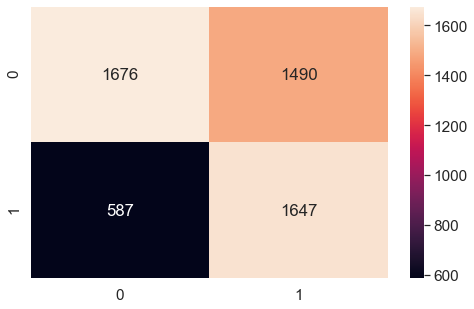

In [21]:
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (8,5))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

## Cross Validation

In [22]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

C:\Users\kx764qe\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kx764qe\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kx764qe\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kx764qe\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kx764qe\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:

In [23]:
print("Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

Accuracy: 0.647 (+/- 0.015)


In [24]:
accuracies.mean()

0.6468120805369126

In [25]:
len(X_train.columns.tolist())

41

## Feature analysis

In [26]:
# Analyzing Coefficients
pd.concat([pd.DataFrame(X_train.columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)

,features,coef
0,age,-0.145310
1,deposits,0.067633
2,withdrawal,0.052317
3,purchases_partners,-0.717841
4,purchases,-0.223923
5,cc_taken,0.095506
6,cc_recommended,0.082701
7,cc_disliked,-0.021612
8,cc_liked,-0.011278
9,cc_application_begin,0.049511


## Feature Selection

In [27]:
# Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [28]:
# Model to Test
classifier = LogisticRegression()
# Select Best X Features
rfe = RFE(classifier, 20)
rfe = rfe.fit(X_train, y_train)

C:\Users\kx764qe\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kx764qe\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kx764qe\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kx764qe\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kx764qe\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:

### summarize the selection of the attributes

In [29]:
print(rfe.support_)

[ True  True  True  True  True  True  True False False  True False  True
  True  True  True False  True  True  True  True  True  True False False
  True  True False False False False False False False False False False
 False False False False False]


In [30]:
print(rfe.ranking_)

[ 1  1  1  1  1  1  1  7 19  1 22  1  1  1  1  2  1  1  1  1  1  1 13  4
  1  1 21  6  3 18 10  8 14 16  9 15 12 11 20 17  5]


In [31]:
X_train.columns[rfe.support_]

Index(['age', 'deposits', 'withdrawal', 'purchases_partners', 'purchases',
       'cc_taken', 'cc_recommended', 'cc_application_begin', 'web_user',
       'ios_user', 'android_user', 'registered_phones', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'housing_R',
       'payment_type_Bi-Weekly'],
      dtype='object')

## Retrain the model

In [32]:
# Fitting Model to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train[X_train.columns[rfe.support_]], y_train)

C:\Users\kx764qe\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
# Predicting Test Set
y_pred = classifier.predict(X_test[X_train.columns[rfe.support_]])

In [34]:
# Evaluating Results
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)

In [35]:
accuracy_score(y_test, y_pred)

0.6111111111111112

In [36]:
f1_score(y_test, y_pred)

0.611111111111111

Test Data Accuracy: 0.6111


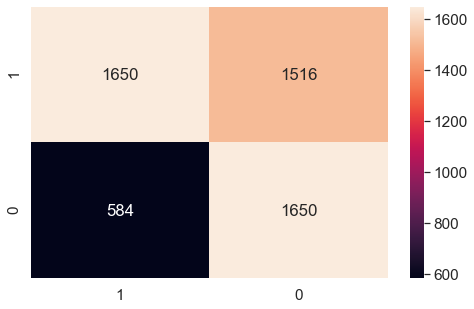

In [37]:
df_cm = pd.DataFrame(cm, index = (1, 0), columns = (1, 0))
plt.figure(figsize = (8,5))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

## Cross validation again

In [38]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier,
                             X = X_train[X_train.columns[rfe.support_]],
                             y = y_train, cv = 10)


C:\Users\kx764qe\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kx764qe\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kx764qe\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kx764qe\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kx764qe\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:

In [39]:
print("Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

Accuracy: 0.647 (+/- 0.015)


### Analyzing Coefficients

In [40]:
pd.concat([pd.DataFrame(X_train[X_train.columns[rfe.support_]].columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)

,features,coef
0,age,-0.150412
1,deposits,0.077879
2,withdrawal,0.053257
3,purchases_partners,-0.710721
4,purchases,-0.233039
5,cc_taken,0.088987
6,cc_recommended,0.083418
7,cc_application_begin,0.048391
8,web_user,0.140592
9,ios_user,0.044780


In [41]:
y_test

2834     1
21018    0
5590     0
15769    0
15120    0
17510    0
21136    1
7994     1
2924     1
26906    0
14574    0
15038    0
25891    1
2198     0
16766    1
17116    1
6220     0
19173    0
17473    1
16945    0
19321    0
23173    0
8046     1
25979    1
22425    0
1834     1
24661    0
7763     1
19537    0
12157    1
        ..
1470     0
25778    1
16140    0
10589    1
11615    0
26766    1
19538    1
18317    0
20011    1
19300    0
21828    1
24591    0
6611     0
26386    0
8728     0
16706    1
3042     1
22462    0
24622    0
18678    1
2719     0
6518     1
22461    0
14486    0
22169    0
16090    1
9851     0
654      1
26248    1
10769    0
Name: churn, Length: 5400, dtype: int64

In [42]:
user_identifier

0        55409
1        23547
2        58313
3         8095
4        61353
5         3120
6        41406
7        67679
8        21269
9        25788
10       13840
11       25899
12       20839
13       13019
14       24387
15       65427
16       30419
17       30693
18       69531
19       34733
20       66712
21       15359
22       25997
23       13813
24       67807
25       19184
26       34210
27       57598
28       57608
29        8381
         ...  
26966    12588
26967    67090
26968    53666
26969    31403
26970    47206
26971    63394
26972    28036
26973    15756
26974    22955
26975    65004
26976    67182
26977     4109
26978    52358
26979    68179
26980    57660
26981    19540
26982    22377
26983    47156
26984    39792
26985    24442
26986    32870
26987    49367
26988    65830
26989    41813
26990    49903
26991    24291
26992     4116
26993    23740
26994    47663
26995    52752
Name: user, Length: 26996, dtype: int64

## Formatting Final Results

In [43]:
final_results = pd.concat([y_test, user_identifier], axis = 1).dropna()
final_results['predicted_churn'] = y_pred
final_results = final_results[['user', 'churn', 'predicted_churn']].reset_index(drop=True)

In [44]:
final_results

,user,churn,predicted_churn
0,61353,1.0,1
1,67679,0.0,0
2,21269,0.0,0
3,69531,0.0,1
4,25997,0.0,0
5,28827,0.0,0
6,58305,1.0,0
7,2351,0.0,1
8,11790,0.0,1
9,46727,0.0,0
